<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

In [21]:
import numpy as np

## Histogram

In [3]:
complaints = [4, 10, 14, 8, 9, 6, 5, 12, 13, 7, 6, 4, 2, 10, 11]

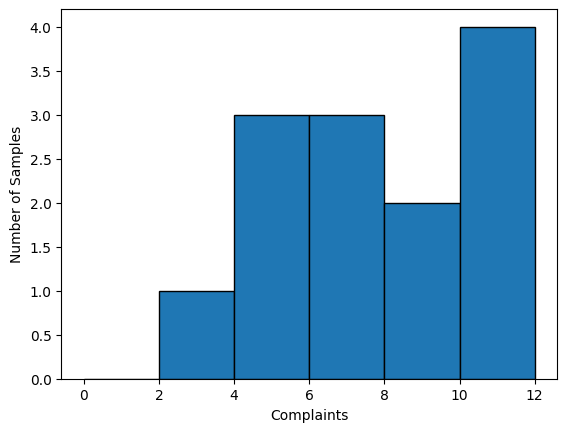

In [8]:
plt.hist(complaints, bins=[0,2,4,6,8, 10, 12], edgecolor="black")
plt.xlabel("Complaints")
plt.ylabel("Number of Samples")
plt.show()

## Pareto Chart

In [14]:
df =  pd.DataFrame({"Number": [56, 32, 112, 58, 88, 49]})

In [15]:
df.index = ["Chip", "Bubble", "Streak", "Scuff", "Discoloration", "Shine"]

In [16]:
df

,Number
Chip,56
Bubble,32
Streak,112
Scuff,58
Discoloration,88
Shine,49


In [17]:
df = df.sort_values(by='Number', ascending=False)

In [18]:
df["cum_perc"] = round(df["Number"].cumsum()/df["Number"].sum()*100,2)

In [19]:
df

,Number,cum_perc
Streak,112,28.35
Discoloration,88,50.63
Scuff,58,65.32
Chip,56,79.49
Shine,49,91.90
Bubble,32,100.00


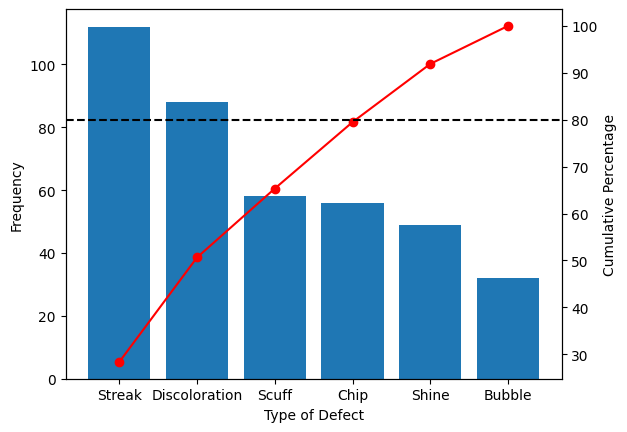

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df.index, df["Number"])
ax.set_xlabel("Type of Defect")
ax.set_ylabel("Frequency")

ax2 = ax.twinx()
ax2.plot(df.index, df["cum_perc"], marker= "o", color="red")
ax2.axhline(80, color="black", linestyle="dashed")
ax2.set_ylabel("Cumulative Percentage")
plt.show()

## Control Chart

In [46]:
import statistics

In [33]:
samp1 = [67, 49, 18, 46, 42, 91, 50, 55, 71, 82, 42, 10, 54, 44, 15, 77, 4, 85, 34, 75]
samp2 = [67, 49, 18, 46,  42,  91,  300,  55,  71,  82,  42,  10,  54,  44,  15,  77,  90,  85,  34,  75]
samp3 = [44, 29, 95, 77,  20,  79, 71,  7,  59,  71,  70,  59, 2,  60,  35,  65,  92,  75, 58, 36]
samp4 = [75, 8, 100, 18, 36, 19, 31, 27, 29, 36, 81, 30, 16, 76, 56, 58, 71, 47, 0, 90]

In [38]:
df = pd.DataFrame(list(zip(samp1, samp2, samp3, samp4)), columns=["Sample1", "Sample2", "Sample3", "Sample4"])

In [39]:
df

,Sample1,Sample2,Sample3,Sample4
0,67,67,44,75
1,49,49,29,8
2,18,18,95,100
3,46,46,77,18
4,42,42,20,36
5,91,91,79,19
6,50,300,71,31
7,55,55,7,27
8,71,71,59,29
9,82,82,71,36


In [42]:
df["Avg"]=df.mean(axis=1)

In [43]:
df

,Sample1,Sample2,Sample3,Sample4,Avg
0,67,67,44,75,63.25
1,49,49,29,8,33.75
2,18,18,95,100,57.75
3,46,46,77,18,46.75
4,42,42,20,36,35.00
5,91,91,79,19,70.00
6,50,300,71,31,113.00
7,55,55,7,27,36.00
8,71,71,59,29,57.50
9,82,82,71,36,67.75


In [44]:
GlobAvg = df["Avg"].mean()

In [48]:
StDev = statistics.stdev(df["Avg"])

In [49]:
UCL = GlobAvg + 2*StDev

In [50]:
LCL = GlobAvg - 2*StDev

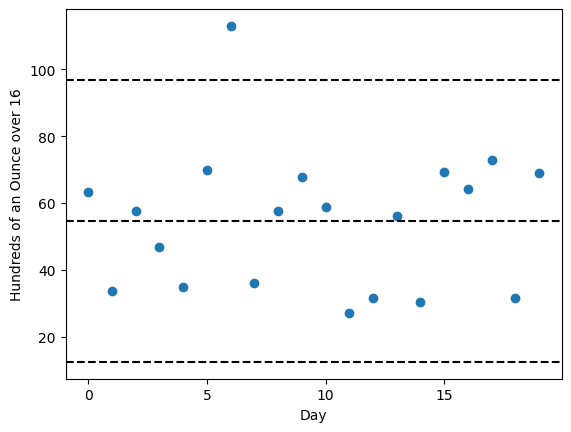

In [60]:
plt.plot(df["Avg"], marker="o", linestyle="none")
plt.axhline(UCL, color="black", linestyle="dashed")
plt.axhline(GlobAvg, color="black", linestyle="dashed")
plt.axhline(LCL, color="black", linestyle="dashed")
plt.ylabel("Hundreds of an Ounce over 16")
plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("Day")
plt.show()

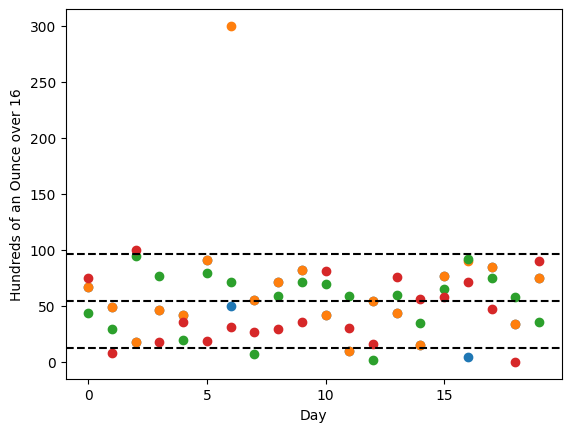

In [61]:
plt.plot(df["Sample1"], marker="o", linestyle="none")
plt.plot(df["Sample2"], marker="o", linestyle="none")
plt.plot(df["Sample3"], marker="o", linestyle="none")
plt.plot(df["Sample4"], marker="o", linestyle="none")
plt.axhline(UCL, color="black", linestyle="dashed")
plt.axhline(GlobAvg, color="black", linestyle="dashed")
plt.axhline(LCL, color="black", linestyle="dashed")
plt.ylabel("Hundreds of an Ounce over 16")
plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("Day")
plt.show()